<a href="https://colab.research.google.com/github/Rafinha003/Explora-o_de_dados/blob/main/ExplorarDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#quando vale o aluguel da sua casa?

In [ ]:
#bibliotecas nescessárias 
import pandas as pd 
import numpy as np

#bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#avisos
import warnings
warnings.filterwarnings('ignore') #ignorar os avisos da biblioteca pandas

#configurações  no panda
pd.set_option('display.max_rows', 200) #maximo de linha  que o pandas ira mostrar
pd.set_option('display.max_columns', 100)  # maximo de coluna que o pandas ira mostrar

#configuração no matplotlib
plt.rcParams['figure.figsize'] = (15, 6) #tamanho padrao pro plt
plt.style.use('seaborn-darkgrid') #definir um estilo padrão

# **Exploração de dados**


In [ ]:
#lendo os dados
base_dados = pd.read_csv('house_data.csv')

#dimensão
base_dados.shape

#vizualizar
base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
 base_dados.tail()  #-> vizulizar os ultimos dados


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22,1587


In [ ]:
#remover colunas
base_dados.drop( columns=['fire insurance (R$)', 'total (R$)'], inplace=True)
base_dados.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [ ]:
#campos vazio
base_dados.isnull().sum().sort_values(ascending = False)
#soma quantos nullo tem em cada coluna e ordena do maior para o menor

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [ ]:
#campos unico -> tipos de registro 
base_dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [ ]:
#tipos da coluna
#base_dados.info()

#base_dados.dtypes
base_dados.dtypes.value_counts()

int64     7
object    4
dtype: int64

# **EXPLORAÇÃO ANALITICA(EDA)**

In [ ]:
base_dados.columns


Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)'],
      dtype='object')

In [ ]:
#Filtrar os tipos de colunas
colunas_categoricas = base_dados.columns[base_dados.dtypes == object]
colunas_numericas= base_dados.columns[base_dados.dtypes != object]

colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [ ]:
# Analise dos campos objetos
base_dados['city'].value_counts(normalize = True) * 100   #normalize = true -> transforma em porcentagem

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [ ]:
#loop
for coluna in colunas_categoricas:
  analise = base_dados[coluna].value_counts(normalize = True) * 100 

 #resultado
print(coluna)
print('')
print(analise)

furniture

not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64


In [ ]:
#correção nos dados

#ajustar o andar
base_dados.loc[ base_dados['floor'] == '301'] #localizando
base_dados.iloc[2562, 5] = 30  #index, coluna, substituindo

#ajustar o '-'
base_dados['floor'] = base_dados['floor'].apply(lambda registro: 0 if registro == '-' else registro )  #função anonima -> vai percorrer toda linha 

#alterando o tipo da coluna
base_dados['floor']= pd.to_numeric(base_dados['floor'])

#verificar
base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


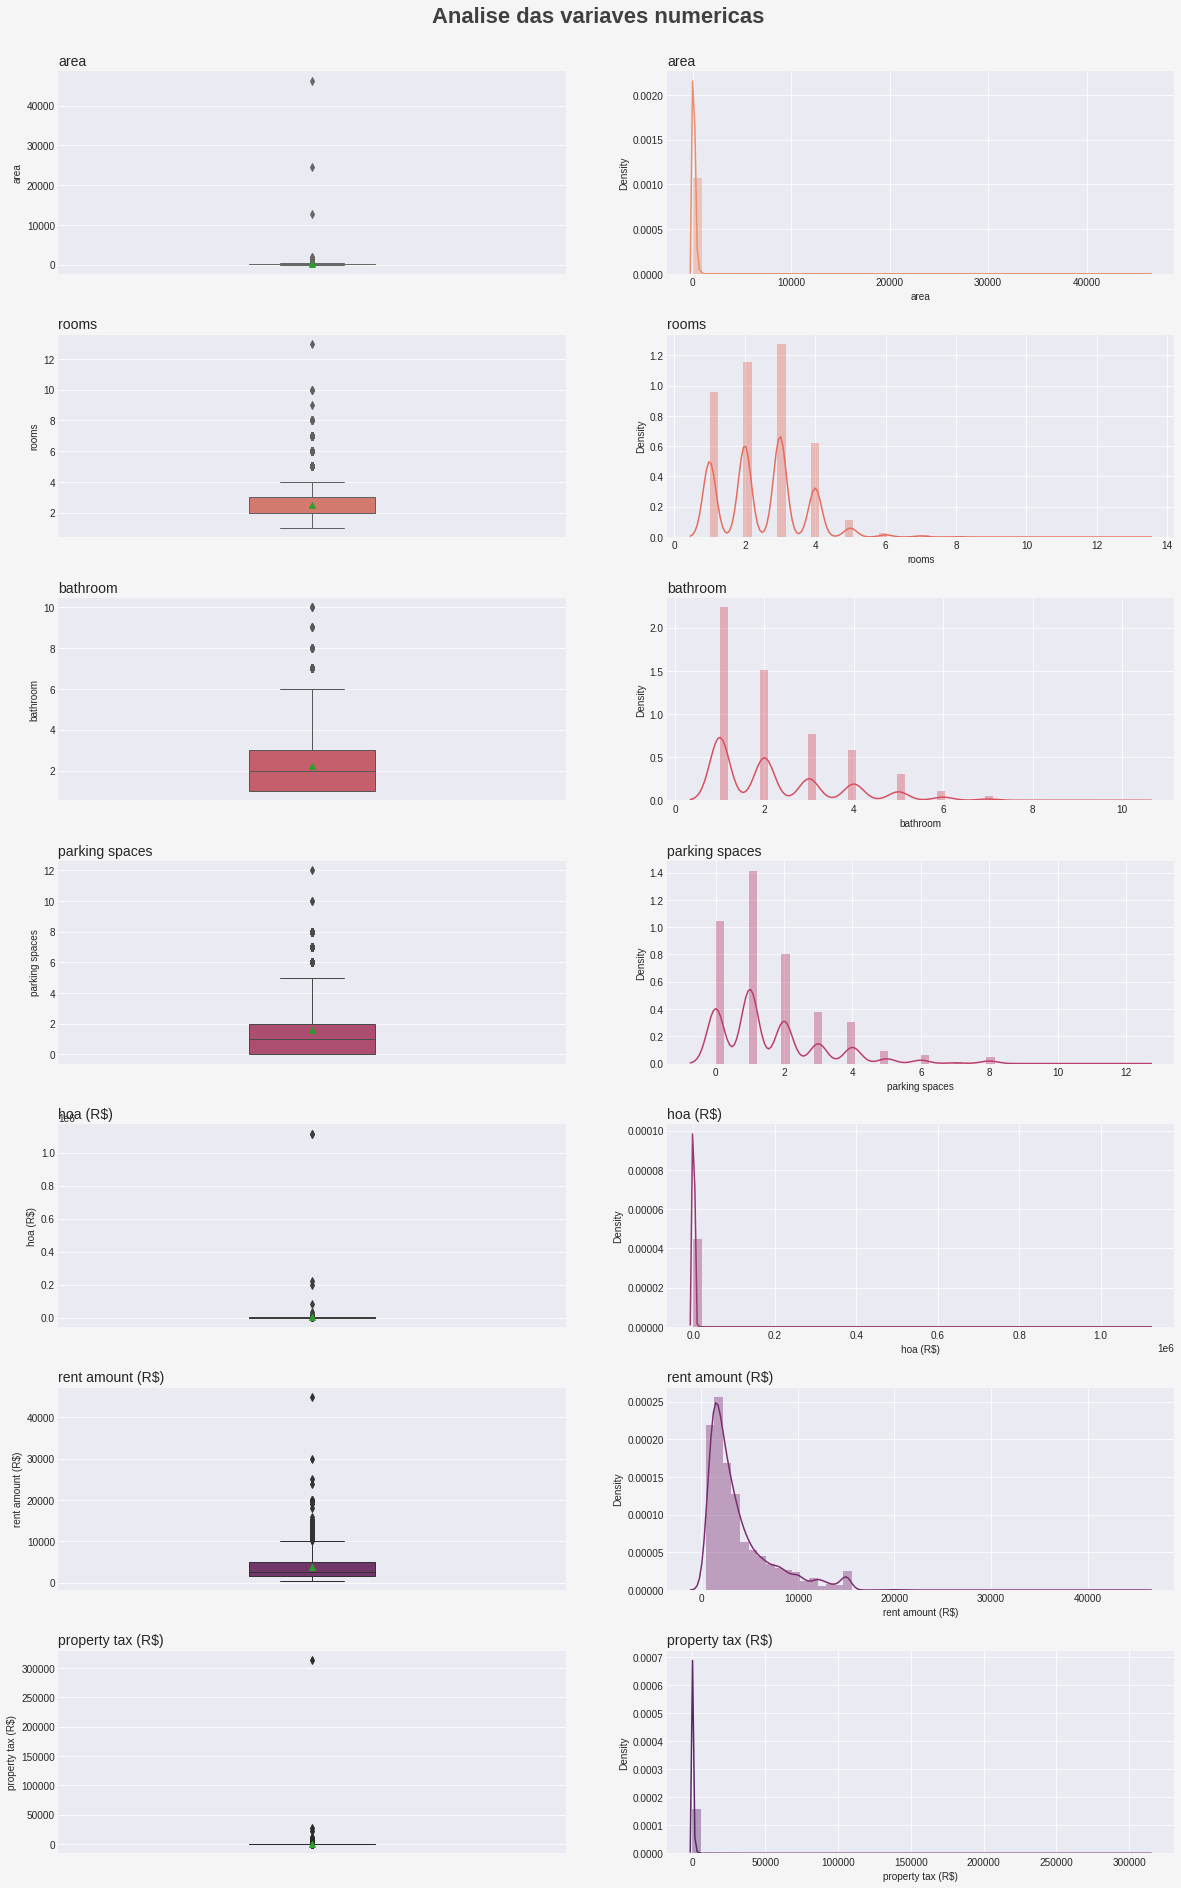

In [ ]:
#dados numericos

#grid = grafico

#tamanho
figura, eixo = plt.subplots(figsize = (20,30))

#cor de fundo
cor_fundo = '#f5f5f5'
figura.set_facecolor(cor_fundo)

#paleta de cores
#sns.color_palette('flare', 10) #10 cor de oppção
paleta_cores = sns.color_palette('flare', len(colunas_numericas) * 2) #sugestao de cor quantidade de colunas (*2 -> serão 2 grafico)

#titulo
plt.suptitle('Analise das variaves numericas', fontsize= 22, color= '#404040', fontweight=600)

#estrutura
linhas =  7 #numero de colunas numerica
colunas = 2 #(boxplot - distplot)
posicao = 1 #posicao inicial

#loop para plotar os graficos
for coluna in colunas_numericas:
  #plot no grid -> boxplot
  plt.subplot(linhas, colunas, posicao)

  #titulo
  plt.title(f'{coluna}', loc='left', fontsize=14, fontweight=200)

  #plot -> popular
  sns.boxplot(data= base_dados, y=coluna, showmeans=True, saturation=0.75, 
              linewidth=1, color= paleta_cores[posicao], width=0.25) #showmeans -> ponto que mostrara a média #saturação, expressura da linha

  #mudar posicao
  posicao += 1

   #plot no grid -> distplot
  plt.subplot(linhas, colunas, posicao)

   #titulo
  plt.title(f'{coluna}', loc='left', fontsize=14, fontweight=200)

  #plot
  sns.distplot(base_dados[coluna], color = paleta_cores[posicao -1]) #manter cor

  #mudar posicao
  posicao += 1

#ajuste de grid 
plt.subplots_adjust( top= 0.95, hspace = 0.3) #topo do relatorio e espaço  entre os graficos

In [ ]:
base_dados.loc[base_dados['area'] <=10000]['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [ ]:
#base_dados.loc[base_dados['hoa (R$)'] <=10000]['hoa (R$)'].describe()

base_dados['hoa (R$)'].sort_values(ascending = False).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: hoa (R$), dtype: int64

In [ ]:
base_dados.iloc[255] #dado estranho -> preço do aluguel

city                 Belo Horizonte
area                            155
rooms                             1
bathroom                          4
parking spaces                    0
floor                             4
animal                    not acept
furniture             not furnished
hoa (R$)                    1117000
rent amount (R$)               2790
property tax (R$)                64
Name: 255, dtype: object

# **Engenharia de Features**


In [ ]:
#ajustes das colunas categoricas
base_dados['animal'] = base_dados['animal'].map({'acept': 1, 'not acept': 0}) #convertendo 
base_dados['furniture'] = base_dados['furniture'].map({'furnished':1, 'not furnished': 0})

#filtrar a cidade de São Paulo
#MVP -> produto minino valor -> para o cliente 
filtro_sp = base_dados.loc[base_dados['city'] == 'São Paulo']

#verificar
filtro_sp.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [ ]:
#retirando coluna cidade
filtro_sp.drop(columns = ['city'], inplace = True)

In [ ]:
#separar dados
caracteristicas = filtro_sp.drop(columns = 'rent amount (R$)') #"conta"
previsor = filtro_sp['rent amount (R$)'] #"resultado"

#verificar
caracteristicas.shape, previsor.shape

((5887, 9), (5887,))

In [ ]:
#corelação na caracteristicas
filtro_sp.corr()

#proxima de 1 -> correlação possitva [ambas sobem]
#proxima de -1 -> correlação negativa [uma sobe outra desce] ex: dolar e real 

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


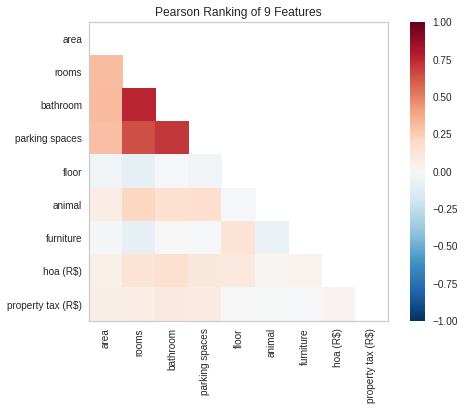

In [ ]:
# correlação usando yellowbrick
from yellowbrick.features import Rank2D

#definir o metodo
correlacao = Rank2D(algoritimo='pearson') #mais padrão

#filtar função
correlacao.fit(caracteristicas, previsor)
correlacao.transform(caracteristicas)
correlacao.show();

In [ ]:
#separar os dados entre teste e treino
from sklearn.model_selection import train_test_split

#divisao de dados
x_treino, x_teste, y_treino, y_teste = train_test_split(
    caracteristicas, previsor, test_size=0.2, random_state=10
)
print(f'dados de treino: {x_treino.shape[0]}')
print(f'dados de teste: {x_teste.shape[0]}')

dados de treino: 4709
dados de teste: 1178


In [ ]:
#analise das features mais revelantes 
from sklearn.feature_selection import  mutual_info_regression 
from sklearn.feature_selection import SelectKBest 

#selecao de features
def selecao_features(x_treino, y_treino):

  #configurar para selecionar as fetures
  selecao = SelectKBest(score_func =  mutual_info_regression, k='all')

  #fitar o aprendizado
  selecao.fit(x_treino, y_treino)

  return selecao

#aplicar essa função
scores = selecao_features(x_treino, y_treino)

#analisar 
for posicao,  score in enumerate(scores.scores_):
    print(f'{x_treino.columns[posicao]}, :{score}')


area, :0.0657880284250334
rooms, :0.26627641376966027
bathroom, :0.3167875809309306
parking spaces, :0.2329492525824879
floor, :0.035111380205066656
animal, :0.030611823999500576
furniture, :0.030441368019707316
hoa (R$), :0.06889867743469313
property tax (R$), :0.16392088408815342


# **CONSTRUÇÃO DO MODELO**

In [ ]:
#Modelo random forest regresson
from sklearn.ensemble import RandomForestRegressor

# instanciar 
modelo_floresta = RandomForestRegressor(max_depth= 5) #profundidade da arvore(evitar decorar os dados)

#fitar
modelo_floresta.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5)

In [ ]:
#avaliar a perfomarce 
previsoes = modelo_floresta.predict(x_teste)

previsoes

array([1531.81708096, 9183.94857423, 7605.48744532, ..., 2104.72070704,
       6291.28712921, 3178.91118762])

In [ ]:
x_teste.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
9659,25,1,1,0,0,0,0,0,84
4671,480,4,5,3,0,1,0,0,742
7122,226,3,4,3,6,1,0,2200,1209
4221,100,2,4,2,12,0,1,885,330
8920,35,1,1,1,14,0,0,1700,275


In [ ]:
y_treino.head()

7212    12000
2211      885
4147     3076
2644     4600
3375     4000
Name: rent amount (R$), dtype: int64

In [ ]:
#função para avaliar
from sklearn.metrics import mean_squared_error, r2_score #avaliar o erro  || calcular nosso modelo se explica
from math import sqrt

#avaliando o modelo
print(f'RMSE: { sqrt(mean_squared_error(y_teste, previsoes)) }') #mostra o erro em R$
print(f'SCORE { r2_score(y_teste, previsoes) }') #se explica

RMSE: 2447.701977965984
SCORE 0.5663805484735003


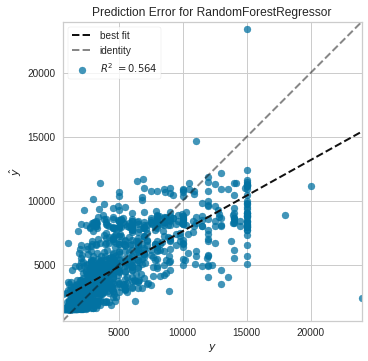

In [ ]:
# Avaliando Yellowbrick
from yellowbrick.regressor import PredictionError

#instanciar
modelo = RandomForestRegressor(max_depth =5)
erro_modelo = PredictionError( modelo)

#fitar
erro_modelo.fit(x_treino, y_treino)
erro_modelo.score(x_teste, y_teste)
erro_modelo.show();

# **EXPORTAÇÃO**

In [ ]:
#exportando modelo
import joblib

joblib.dump(modelo_floresta, 'modelo_floresta_aleatorio_v100.pkl')

['modelo_floresta_aleatorio_v100.pkl']

In [ ]:
#Testando o modelo treinado

funcao_modelo_carregado = joblib.load('modelo_floresta_aleatorio_v100.pkl')

In [ ]:
#testtando a previsao
funcao_modelo_carregado.predict(x_teste.head(1).values)
#fazer um predict com base do que estamos enviando

array([1531.81708096])

In [ ]:
x_teste.head(1).values

array([[25,  1,  1,  0,  0,  0,  0,  0, 84]])